### In this notebook, I create a simple linear regression using TensorFlow.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# generate some example data
x_train = np.linspace(0,100,100) + np.random.uniform(-15,.5,100)
y_train = np.linspace(0,100,100) + np.random.uniform(-15,15,100)

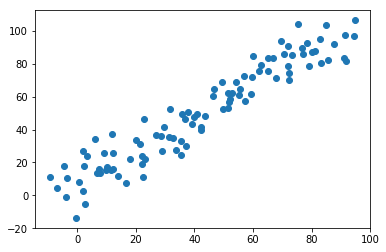

In [3]:
# visualize the data
plt.scatter(x_train, y_train)

##### The goal is to find the slope and the y-intercept of the line that best fits these data and can perform well on new unseen data.

In [4]:
# initialize the slope and the bias as TensorFlow variables with random values
m = tf.Variable(0.15)
b = tf.Variable(0.62)

#### The cost function is defined as the sum of all the squared errors

In [5]:
# initialize the cost value with the value 0
err = 0

# iterate through all x_data and y_lable and find the value that our  
# model predicts and compare it to the real value of y (y_label)
for x,y in zip(x_train, y_train):
    
    # estimate the value of y
    y_hat = m*x + b
    
    # calculate the squared error
    err += (y-y_hat)**2

#### This model uses the gradient descent algorithm to minimize the cost function. 

In [6]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.000001)

# optimize the cost
train = optimizer.minimize(err)

In [7]:
# initialize the TensorFlow variables
init = tf.global_variables_initializer()

In [8]:
# start the session and run the train
with tf.Session() as sess:
    # run the initializer
    sess.run(init)
    
    # training steps
    steps = 30
    
    # run the train for 'steps' time
    for i in range(steps):
        sess.run(train)
        
    # get the learned slope and bias
    m_learned, b_learned = sess.run([m,b])
    print(m_learned, b_learned)

1.1146672 0.65002924


#### Let's generate some test data and predict their label using the line learned in the previous section, then plot the data and the line

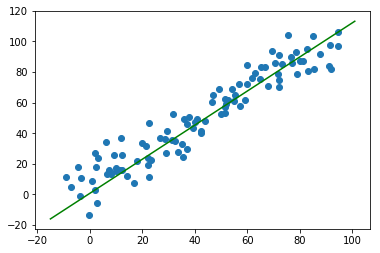

In [9]:
# generate test data
x_test = np.linspace(-15,101,100)
# use the slope and the bias to predict values for the test data
y_predidted = m_learned*x_test + b_learned

plt.scatter(x_train, y_train)
plt.plot(x_test, y_predidted,'g')